<a href="https://colab.research.google.com/github/Sasanika/machine_learning_projects/blob/main/loanPredictionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

In [3]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
loan_dataset[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = imputer.fit_transform(loan_dataset[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [4]:
# Drop remaining rows with missing values (if any)
loan_dataset = loan_dataset.dropna()

In [5]:
# Encode labels
label_encoder = LabelEncoder()
loan_dataset['Loan_Status'] = label_encoder.fit_transform(loan_dataset['Loan_Status'])

In [6]:
# Replace '3+' in Dependents
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(to_replace='3+', value=4).astype(int)


In [7]:
# Convert categorical columns to numerical
loan_dataset = pd.get_dummies(loan_dataset, columns=['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education'], drop_first=True)

In [8]:
# Separate data and labels
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'])
Y = loan_dataset['Loan_Status']

In [9]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)


In [10]:
# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])


In [11]:
# Train model
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [12]:
# Evaluate model
X_train_prediction = pipeline.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.8072289156626506


In [13]:
X_test_prediction = pipeline.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data: ', test_data_accuracy)


Accuracy on test data:  0.8214285714285714


In [14]:
# Confusion Matrix and Classification Report
print('Confusion Matrix:\n', confusion_matrix(Y_test, X_test_prediction))
print('Classification Report:\n', classification_report(Y_test, X_test_prediction))

Confusion Matrix:
 [[ 7 10]
 [ 0 39]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58        17
           1       0.80      1.00      0.89        39

    accuracy                           0.82        56
   macro avg       0.90      0.71      0.73        56
weighted avg       0.86      0.82      0.79        56



In [15]:
# Hyperparameter Tuning with Grid Search
param_grid = {'svm__C': [0.1, 1, 10, 100], 'svm__kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [16]:
# Best Parameters and Accuracy
print('Best Parameters: ', grid_search.best_params_)
best_model = grid_search.best_estimator_
best_test_data_accuracy = accuracy_score(Y_test, best_model.predict(X_test))
print('Accuracy on test data with best model: ', best_test_data_accuracy)

Best Parameters:  {'svm__C': 0.1, 'svm__kernel': 'linear'}
Accuracy on test data with best model:  0.8214285714285714


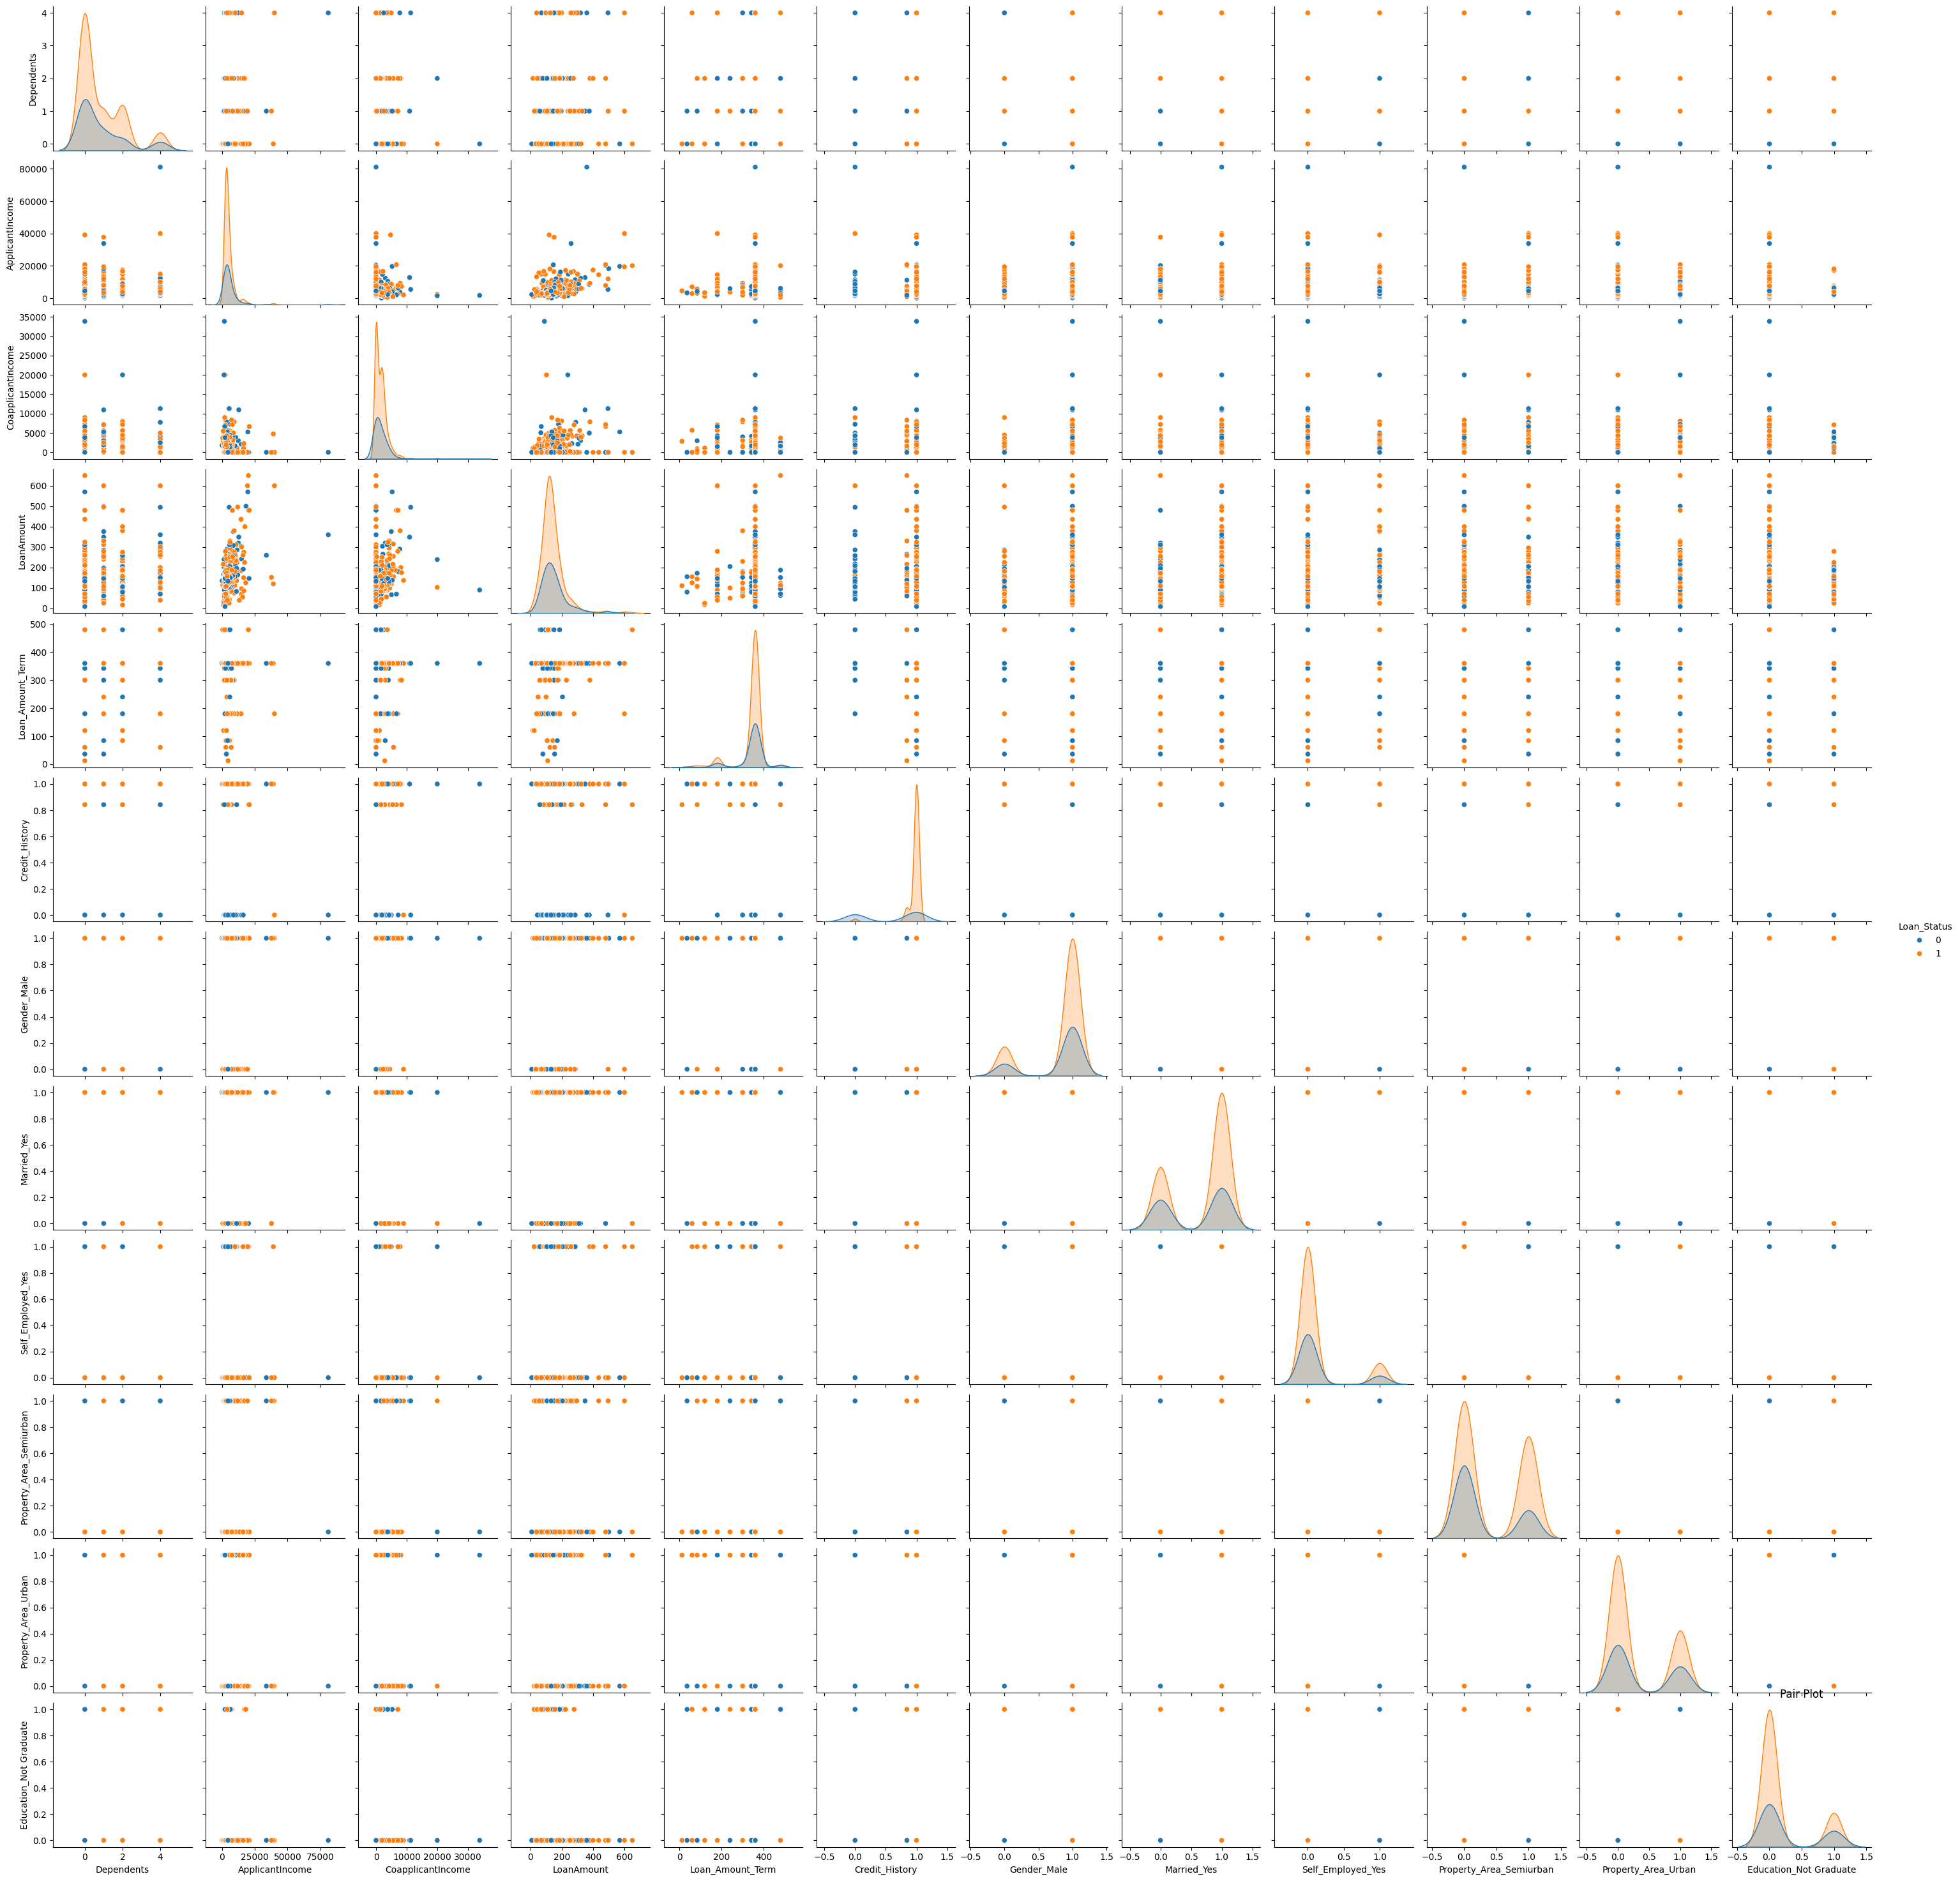

In [19]:
# Pair Plot
sns.pairplot(loan_dataset, hue='Loan_Status')
plt.title('Pair Plot')
plt.show()

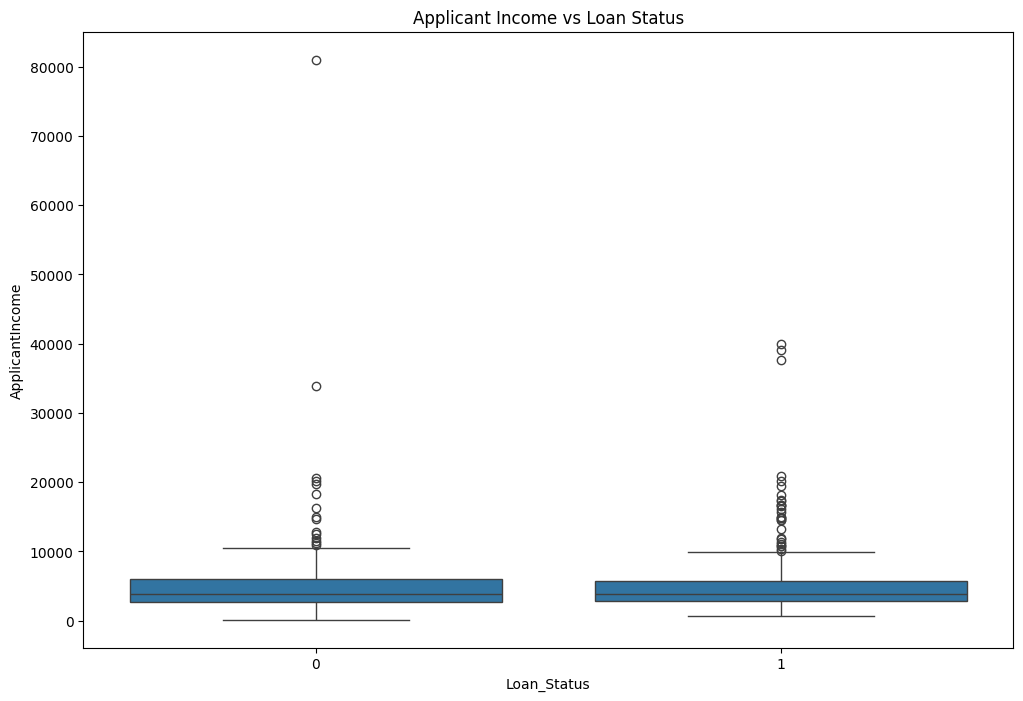

In [20]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_dataset)
plt.title('Applicant Income vs Loan Status')
plt.show()

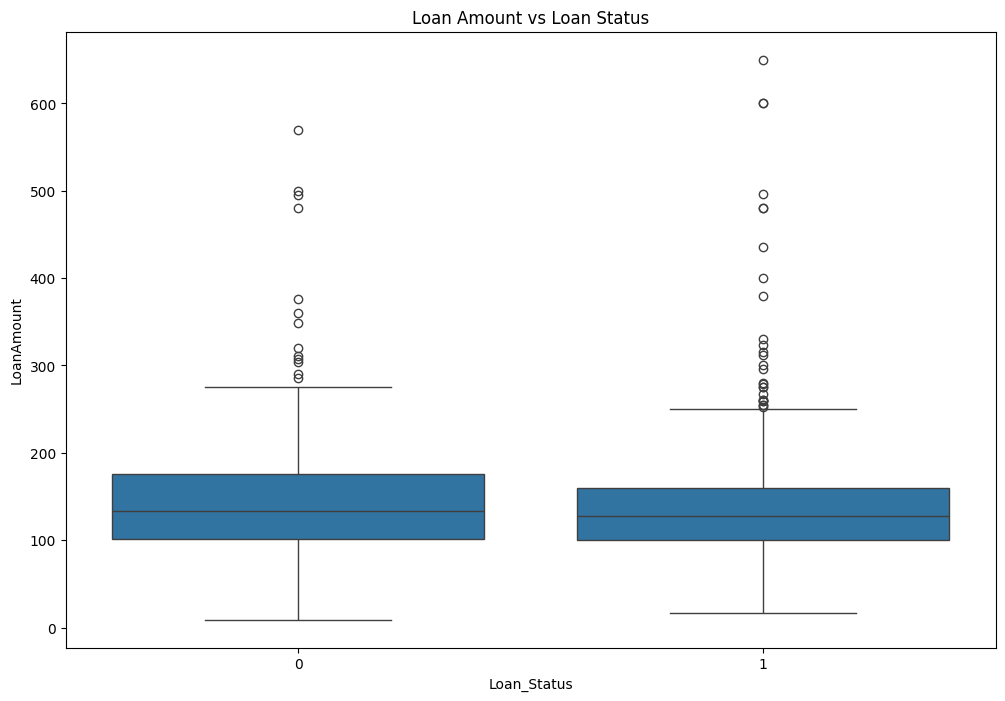

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_dataset)
plt.title('Loan Amount vs Loan Status')
plt.show()

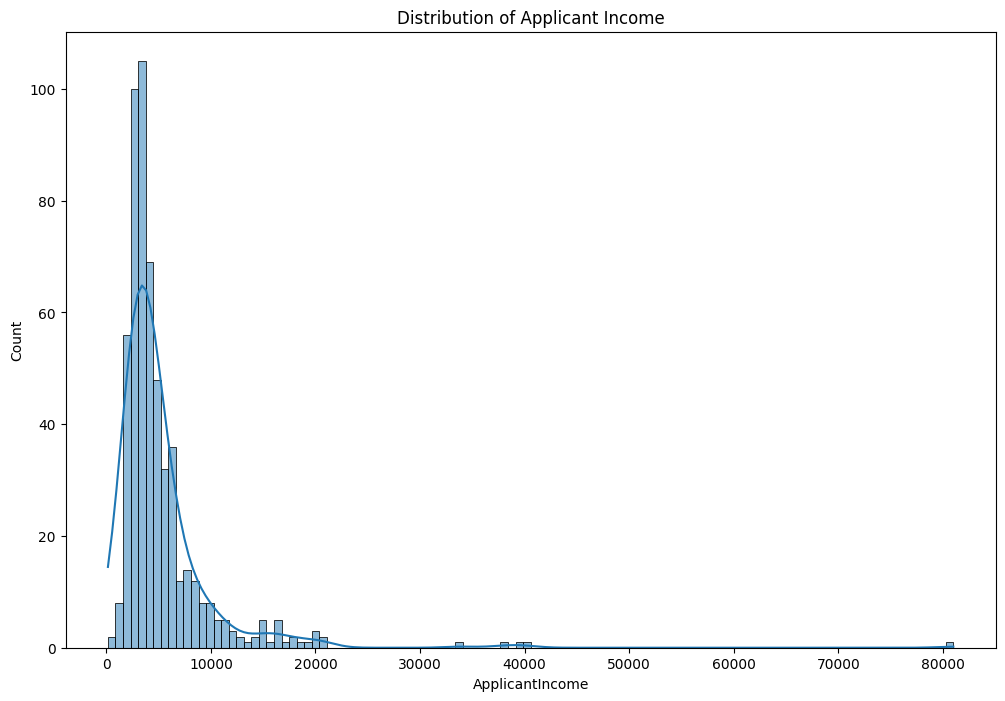

In [22]:
# Distribution Plot
plt.figure(figsize=(12, 8))
sns.histplot(loan_dataset['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

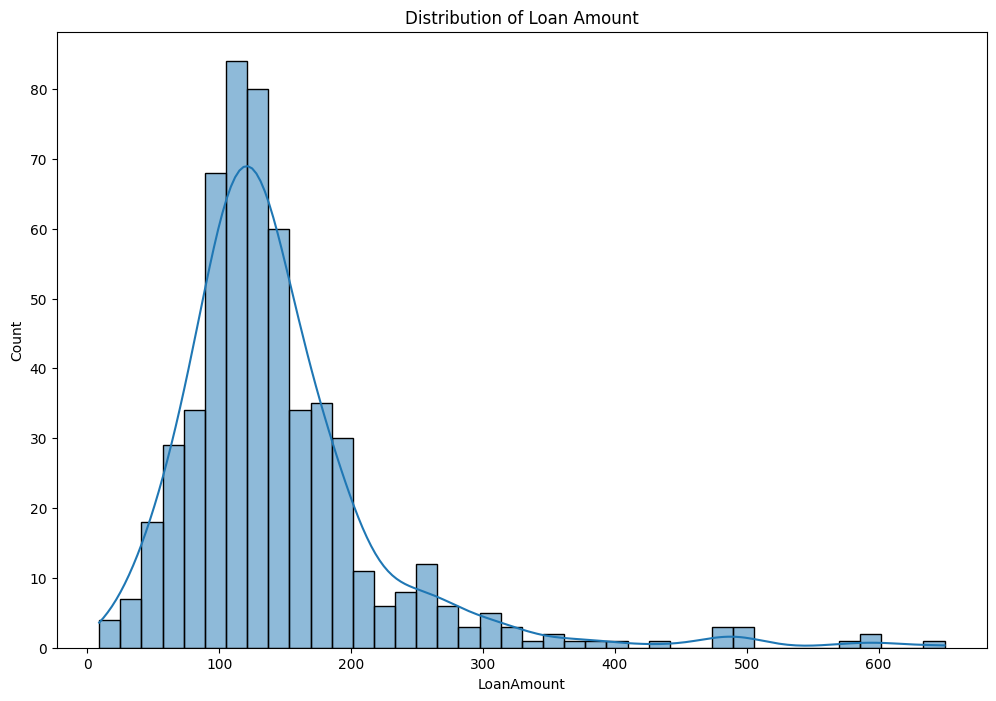

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(loan_dataset['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

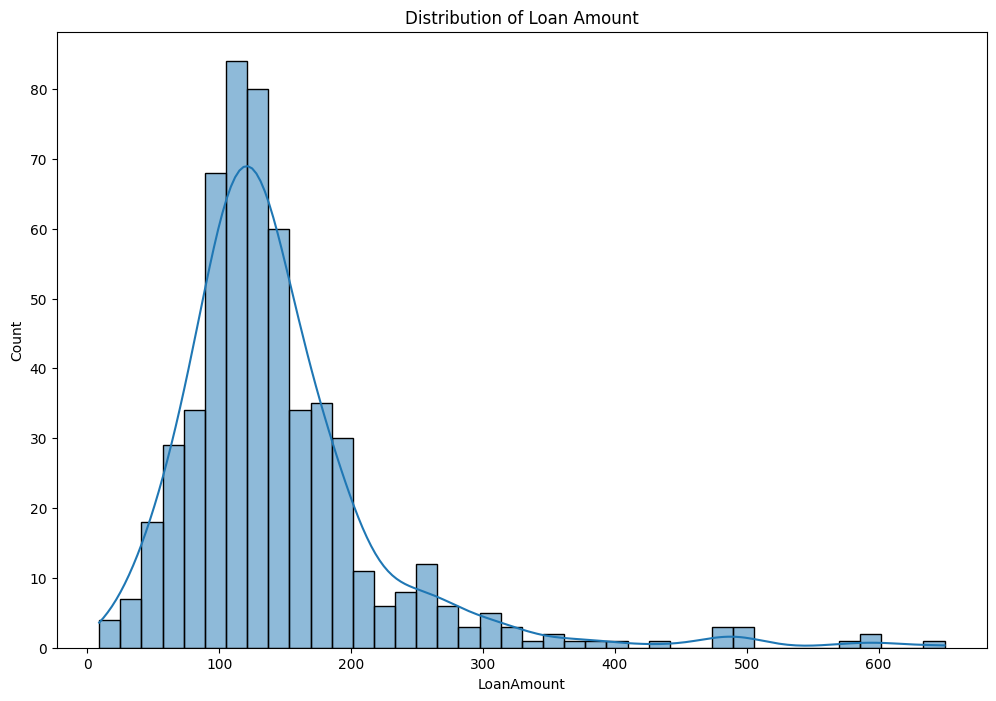

In [24]:
plt.figure(figsize=(12, 8))
sns.histplot(loan_dataset['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()